# MSDS 7333 - Final Case Study: Signal Frontier Analysis Recreation in R

### Investigators
- [Matt Baldree](mailto:mbaldree@smu.edu?subject=lab2)
- [Ben Brock](bbrock@smu.edu?subject=lab2)
- [Tom Elkins](telkins@smu.edu?subject=lab2)
- [Austin Kelly](ajkelly@smu.edu?subject=lab2)


<div style='margin-left:10%;margin-right:10%;margin-top:15px;background-color:#d3d3d3;padding:5px;'>
    <h3>Original Instructions</h3>
    <p>Choose either the Signal Frontier Analysis application or Future Contract Rolling application.</p>
     <p>Steps:</p>
    <ol>
        <li>Use different stocks than those shown in examples.</li>
        <li>Create IPython Notebook, including code, output, and graphics.</li>
        <li>Include an introduction in your notebook to give background on your application.</li>
        <li>Be sure to explain calculations and output in the appropriate places.</li>
        <li>List outside references if used.</li>
        <li>The filename should incliude your first initial and last name and '_case study title'.</li>
    </ol> 
    <p>Report Sections:</p>
    <ol>
        <li>[Introduction](#introduction) <b>(5 points)</b></li>
        <li>[Background](#background) <b>(10 points)</b></li>
        <li>[Methods](#methods) <b>(30 points)</b></li>
        <li>[Results](#results) <b>(30 points)</b></li>
        <li>[Conclusion](#conclusion) <b>(5 points)</b></li>
        <li>[Bibliography and Citation](#biblio) <b>(5 points)</b></li>
        <li>[Code](#code) <b>(5 points)</b></li>
    </ol>
     <p>Other Grading Criterium:</p>
    <ol>
        <li>Grammar and Organization <b>(10 points)</b></li>
    </ol>
    
    <h3>Final Instructions</h3>
    <p>2. Redo one of the other case studies. In order for this to count, you need to add something to the case study that you didn't have time/didn't know how to do previously. For example, you can use R to redo a case study if you used Python the first time, and compare the results from the two software packages. </p>
</div>

## A Note to the Reader
For the final project, we decided to recreate Case Study 4 to be computed in R, rather than the inital language Python.

## Abstract
<font size = 1>
<div style='margin-left:0%;margin-right:0%;margin-top:10px;background-color:#d3d3d3;padding:10px;'>
<h3>Note: The expected audience for this exercise is comprised of people who are not in the field of finance, rather, those who would be reaching out to a contractor to fill the gap.</h3>
</div>  
</font>

### Risk and Return for a Portfolio of Risky Assets

When risky assets are combined into a portfolio, the expected portfolio return is a weighted average of the assets' expected returns, where the weights are the percentages of the total portfolio value invested in each asset. When risky assets are combined into a portfolio, the expected portfolio return is a weighted average of the assets' expected returns, where the weights are the percentages of the total portfolio value invested in each asset. Industry has defined the Sharpe Ratio as a standard to measure the risk in a portfolio. This case study, the Signal Frontier Application, creates a portfolio of stocks and determines its Sharpe Ratio given a range of holding and lookback periods.

The standard deviation of returns for a portfolio of risky assets depends on the standard deviations of each asset's return ({$\sigma$}), the proportion of the portfolio in each asset, and on the covariance (or correlation) of returns between each asset pair in the portfolio.

<b>In this case, we will measure the performance of the Portfolio Manager by using *Sharpe Ratio* analysis. The Sharpe Ratio of a portfolio is the excess returns per unit of total portfolio risk. Higher Sharpe ratios indicate better risk-adjusted portfolio performance [6].</b> 

<a id='introduction'></a>
## 1 - Introduction
<div style='margin-left:10%;margin-right:10%;margin-top:15px;background-color:#d3d3d3;padding:10px;'>
<h3>Introduction (<b>5 points total</b>)</h3>
</div>

How does one measure the performance of a portfolio manager?  What does a typical investor of a financial institution's portfolio manager look like?   The three (3) basic types of investors are (1) a **risk-averse** investor, (2) a **risk-seeking** investor, and (3) a **risk-neutral** investor.   A **risk-averse** investor is one who dislikes risk (i.e., prefers less risk to more risk).  A **risk-seeking** (risk-loving) investor prefers more risk to less and, given equal expected returns, they will choose the more risky investment. Lastly, a **risk-neutral** investor has no preference regarding risk and would be indifferent between two such investments [4]. 

Moreover, a savvy risk-averse investor may select a very risky portfolio despite being risk averse; a savvy risk-averse investor may hold very risky assets if he/she feels that the extra return he/she expects to earn is adequate compensation for the additional risk[4]. Typical funds managed for these types of clines are shown in Table 1.1.

|Investor|Risk Tolerance|Investment Horizon|Liquidity Needs|Income Needs|
|:-----|:--------|:----------|:----------|:-----:|
|Individual|Depends on individual|Depends on individual|Depends on individual|Depends on individual|
|Defined Benefit Pensions|High|Long|Low|Depends on age|
|Banks|Low|Short|High|Pay interest|
|Endowments|High|Long|Low|Spending level|
|Insurance|Low|Long-Life|High|Low|
|Insurance|Low|Short-Property & Casaulty|High|Low|
|Mutual Funds|Depends on fund|Depends on fund|High|Depends on fund|


<a id="parameters"></a>
<p style='text-align: center;'>
Table 1.1: Characteristics of Different Types of Investors
</p>

For this case study, our team selected the <b>Signal Frontier Analysis Application</b> for five stocks over a 16 month period, see Table 1.2. In this analysis, the Sharpe Ratio is calculated to determine the risk adjusted returns for the portfolio over a range of holdings and lookback periods. A visualization of this analysis is provided in a heatmap for better intuition. 

|Company|Company Symbol Value|
|:-----|:--------|
|Facebook, Inc.|FB|
|Netflix, Inc. |NFLX|
|Twitter, Inc.|TWTR|
|Amazon.com, Inc.|AMZN| 
|NVIDIA Corporation|NVDA|   

<a id="parameters"></a>
<p style='text-align: center;'>
Table 1.2: List of Stocks in Portfolio for Risk-Seeking Client
</p>

In [1]:
# Import the necessary libraries
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
from __future__ import division
from __future__ import print_function
from pandas import Series, DataFrame
from pandas_datareader import data
from numpy.random import randn

pd.options.display.max_rows = 12
np.set_printoptions(precision=4, suppress=True)
plt.rc('figure', figsize=(12, 6))

ImportError: cannot import name 'PandasError'

In [2]:
print('pandas 19.2 and pandas-datareader 0.2.1 required.')
print('pandas', pd.__version__)
print('numpy', np.__version__)
print('matplotlib', mpl.__version__)

pandas 19.2 and pandas-datareader 0.2.1 required.
pandas 0.19.2
numpy 1.11.3
matplotlib 2.0.0


In [3]:
%matplotlib inline
%pwd

'/Users/mattbaldree/Google Drive/smu/quantifying/QTW_04/QTW_04_Financial'

<a id="background"></a>
## 2 - Background

<div style='margin-left:10%;margin-right:10%;margin-top:15px;background-color:#d3d3d3;padding:10px;'>
<h3>Background (<b>10 points total</b>)</h3>
</div>

"Mean reversion is the assumption that a stock's price will tend to move to the average price over time." [3] This assumption is used to review a list of stocks for their cumulative returns and then compute a portfolio for a particular lookback in time along with days between trading (holding period) to determine the portfolio's Sharpe Ratio. [2] "The Sharpe Ratio is a measure for calculating risk-adjusted return and is considered the industry standard for such calculations [4]."  It is defined as the mean portfolio return minus risk-free rate divided by standard deviation of portfolio return; i.e.: 

<b>Sharpe Ratio =</b>

$$\frac{\bar{r_p}-r_f}{\rho_p}$$

where: 
- $\bar{r_p}$ = Expected portfolio return.
- $r_f$ = Risk free rate
- $\rho_p$ = Portfolio standard deviation

### Portfolio Management Process

Our financial investment firm prides ourselves in being able to serve all types of investors with respect to their needs based on our portfolio managers initial meeting with the investor (client or customer). During this initial meeting, the portfolio manager interviews the potential investor paying close attention to the client's financial goals and personal planning. Planning begins with an analysis of the investor's risk tolerance, return objectives, time horizon, tax exposure, liquidity needs, income needs, and any unique circumstances or investor preferences [6].

This analyis results in an investment policy statement (IPS) that (1) details the investor's investment objectives and constraints, (2) specifies an objective benchmark, and should be updated at least every few years as well as any time the investor's objectives or constraints change significantly [6].

One of the organic features of our one-to-one client relationships is the execution step of the IPS statement. The execution step requires an analysis of the risk and return characteristics of various asset classes to determine the asset allocation. In top-down analysis, a portfolio manager examines current macroeconomic conditions to identify the asset classes that are most attractive. In bottom-up analysis, portfolio managers seek to identify individual securities that are undervalued [6].
Finally, feedback is the final step. Over time, investor circumstances will/can change, risk and return characteristics of asset classes will/can change, and the actual weights of the assets in the portfolio will/can change with asset prices. The portfolio manager must monitor changes, rebalance the portfolio periodically, and evaluate performance relative to the benchmark portfolio identified in the investment policy statement [6]. **The goal is to keep the portfolio within the risk tolerance of the client.**

This is the main advantage of our financial institution where we treat each investor as family not just another customer. Our goal is to make sure each investor meets their financial goals regardless of the macro-economic changes.

<a id="methods"></a>
## 3 - Methods

<div style='margin-left:10%;margin-right:10%;margin-top:15px;background-color:#d3d3d3;padding:10px;'>
<h3>Methods (<b>30 points total</b>)</h3>

## Retrieve Stock Data Percent Change 

This is is based on the input list of Stocks and frequency.  Here, ***freq*** is the Time series variable.

In [4]:
def stock_returns(panel_data, freq):    
    '''
    Method name: stock_returns
    Based on the closing date of the input portfolio list and input frequency, 
    return the percent change of the stocks based on the specific stock closing
    value and input frequency.
 
    arguments parameters
    panel_data:  list of stocks in the portfolio
    freq:        Business day frequency

    return value:
    array list of pct_change for stock based on freq
    '''

    # 'B' = business, 
    # 'ffill' = propagate last valid observation forward to next valid value
    stock_data = panel_data['Close'].asfreq(freq, method='ffill')

    # returns
    return stock_data.pct_change()

In [5]:
# parameters
stock_names = ['FB', 'NFLX', 'TWTR', 'AMZN', 'NVDA']
source = 'google'
start = '1/1/2016'
end = '5/1/2017'

In [6]:
# retrieve stock data
stocks = data.DataReader(stock_names, 'google', start, end)

# print out panel axes
stocks.axes

[Index(['Open', 'High', 'Low', 'Close', 'Volume'], dtype='object'),
 DatetimeIndex(['2016-01-04', '2016-01-05', '2016-01-06', '2016-01-07',
                '2016-01-08', '2016-01-11', '2016-01-12', '2016-01-13',
                '2016-01-14', '2016-01-15',
                ...
                '2017-04-18', '2017-04-19', '2017-04-20', '2017-04-21',
                '2017-04-24', '2017-04-25', '2017-04-26', '2017-04-27',
                '2017-04-28', '2017-05-01'],
               dtype='datetime64[ns]', name='Date', length=334, freq=None),
 Index(['AMZN', 'FB', 'NFLX', 'NVDA', 'TWTR'], dtype='object')]

## Show Cumulative Returns

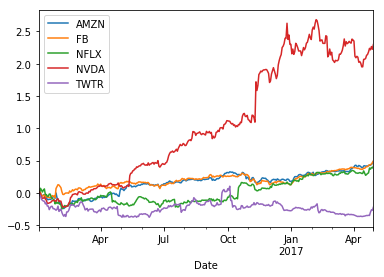

In [7]:
# plot cumulative returns
# cumprod = cumulative product over axis
((1 + stock_returns(stocks, 'B')).cumprod() - 1).plot()

With return percentage on the y-axis, this chart details the evolution of each of the five companies over the 16 month interval. While Nvidia saw a massive increase in returns over that period, Amazon, Facebook and Netflix experienced a relatively stable increase. While the others were on average positive, Twitter was the only company which was reliably negative, showing more and more negative results over the same period. 

## Calculate Sharpe Ratio for Stock Portfolio

In [8]:
def calc_mom(price, lookback, lag=1):  
    '''
    Method name: calc_mom
    A transform function to compute mean reversion over a user defined lookback.
    This method will standardize and rank the data in descending order.
 
    arguments parameters
    price:      price of stock
    lookback:   how many previous periods to account for
    lag:        relative weight of each of the lagging periods

    return value:
    array list of standardized data
    '''

    # shift index by lag periods and determine percent change
    mom_ret = price.shift(lag).pct_change(lookback)
    # compute numerical data ranks along column in descending order
    ranks = mom_ret.rank(axis=1, ascending=False)
    # subtract off means 
    demeaned = ranks.subtract(ranks.mean(axis=1), axis=0)
    # divide by standard deviation
    return demeaned.divide(demeaned.std(axis=1), axis=0)

In [9]:
compound = lambda x: (1 + x).prod() - 1
daily_sr = lambda x: x.mean() / x.std()


def strat_sr(prices, lb, hold):   
    '''
    Method name: strat_sr
    A strategy to return a Sharpe Ratio given stock prices, lookback and 
    holding period.
 
    arguments parameters
    prices:      price of the stock    
    lookback:    number of periods to look back to
    hold:        how many periods to hold the stock(s) in question

    return value:
    array list of daily_sr portfolio returns divided by the (252) business day
    horizon
    '''

    # compute protfolio weights; 
    # e.g., 30 for hold will create a freq = '30B' period
    freq = '%dB' % hold
    # create new portfolio
    port = calc_mom(prices, lb)
    # daily returns
    daily_rets = prices.pct_change()
    
    # compute portfolio returns
    port = port.shift(1).resample(freq).first()
    returns = daily_rets.resample(freq).apply(compound)
    port_rets = (port * returns).sum(axis=1)
    
    # 252 = busines days
    return daily_sr(port_rets) * np.sqrt(252 / hold)

In [10]:
strat_sr(stocks['Close'], 70, 30)

-0.97931554590193715

As a reminder, the Sharpe Ratio is calculated to determine the risk-adjusted returns for the portfolio in question. For reference, a Sharpe Ratio of 1 is considered good, while a ratio of 3 or above is considered to be excellent. In this portfolio's case, the ratio is nearly -1 which is a characteristic of a **risk-seeking** investor. While the portfolio did see an overall increase in returns, the risk associated with such a gamble could be considered extreme. It is important to keep in mind that this Sharpe Ratio is the result of a lookback period of 70 with a holding period of 30. 

Let's visualize the different combinations to see if there is a better option for lookback and holding periods.

## Visualization of Sharpe Ratio

In [11]:
def heatmap(df, cmap=plt.cm.gray_r):
    '''
    Method name: heatmap
    A strategy to return a Sharpe Ratio given stock prices, lookback and 
    holding period.
 
    argument parameters
    df:          pandas DataFrame
    cmap:        color of cmap


    return value:
    None
    '''
    
    fig = plt.figure()
    ax = fig.add_subplot(111)
    # imshow - plot numpy array as images
    axim = ax.imshow(df.values, cmap=cmap, interpolation='nearest')
    ax.set_xlabel(df.columns.name)
    ax.set_xticks(np.arange(len(df.columns)))
    ax.set_xticklabels(list(df.columns))
    ax.set_ylabel(df.index.name)
    ax.set_yticks(np.arange(len(df.index)))
    ax.set_yticklabels(list(df.index))
    plt.colorbar(axim)

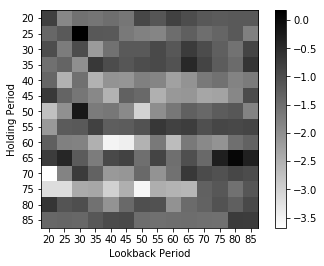

In [12]:
# evaluate strategy Sharpe Ratio function of a grid of parameters
from collections import defaultdict

lookbacks = range(20, 90, 5)
holdings = range(20, 90, 5)
dd = defaultdict(dict)
for lb in lookbacks:
    for hold in holdings:
        dd[lb][hold] = strat_sr(stocks['Close'], lb, hold)
        
ddf = DataFrame(dd)
ddf.index.name = 'Holding Period'
ddf.columns.name = 'Lookback Period'

heatmap(ddf)

The Heatmap for this portfolio of stocks over a range of holding and lookback periods show the portfolio has higher performance for holding between 60-70 and a lookback between 20-50. Lighter color is a better ratio.

<a id="results"></a>
## 4 - Results

<div style='margin-left:10%;margin-right:10%;margin-top:15px;background-color:#d3d3d3;padding:10px;'>
<h3>Results (<b>30 points total</b>)</h3>

The data required for this exercise was retrieved from Google. Once this was achieved, the stock_returns method was created to define the parameters, including the closing date of the input portfolio list and frequency. The stock_returns function returns the percentage change of the stocks based on the specific stock closing value as well as the input frequencies. 

Before the Sharpe Ratio was calculated, a transform function was created to compute the mean reversion over the lookback as defined by the user. With this transformation completed, the ratios were then calculated based on the parameters from the transform function. This new strategy function (strat_sr) returns the Sharpe Ratio by computing each of the portfolio weights, creating a new portfolio, calculates the percent change and portfolio returns. 

Once the Sharpe Ratio has been calculated, we were able to generate the heatmap to display the results of all the different possible combinations of holding and lookback periods. This was accomplished by generating a grid of lookback and holdings in  increments of 5. From what we noticed, while the resulting Sharpe Ratio was not the most detrimental, there were many other combinations of lookback and holding periods which would have resulted in a more beneficial ratio. This can be seen from the heatmap in the methods section.

Of the five stocks selected, Nvidia had the highest overall cumulative return in the 15-month span while Twitter stayed near the bottom with negative overall returns. For a risk-neutral or risk-seeking investor, it would be wise to rebalance the portfolio by subsituting another stock option for Twitter. This will likely minimize overall negative returns for the portfolio. 

<a id="conclusion"></a>
## 5 - Conclusion

<div style='margin-left:10%;margin-right:10%;margin-top:15px;background-color:#d3d3d3;padding:10px;'>
<h3>Conclusion (<b>5 points total</b>)</h3>

There are numerous ways to measure the performance of a financial portfolio. For this case study, Python was used to calculate the Sharpe Ratio to gauge the performance of a portfolio. While Nvidia was the most volatile stock and saw the highest overall returns, Twitter proved to be the worst performing stock out of all five, with overall negative returns.

Other measures to consider instead of the more common Sharpe Ratio include: Roy's Safety First Ratio, Sortino Ratio, Treynor Ratio, and the Information Ratio. "In contrast to the Sharpe, Sortino and Roy's safety-first ratios, the information ratio uses the standard deviation of active returns as a measure of risk instead of the standard deviation of the portfolio [5]." All of these measures help the investor calculate the excess return per unit risk. While all of these measures are helpful, it is important to remember they are independent of one another and cannot be compared as they are different measures of performance.

In summary, all of the above ratios help investors calculate the excess return per unit of risk with slight differences. It is important to standardize returns on a risk-adjusted basis when comparing portfolios to one another.  That is, the Sortino Ratio of one portfolio cannot be compared to the Sharpe Ratio or Information Ratio of another. We want to be able to compare apples to apples and oranges to oranges [5].

It is best practice based in Modern portfolio theory to have a portfolio of stocks that is diversified to reduce portfolio risk without reducing the portfolio's expected return.  For example, to have a portfolio of stocks which consist of hi-tech stocks, medical stocks, and food or beverage stocks.  Portfolio diversification works best when financial markets are operating normally, and diversification provides less reduction of risk during market turmoil [6].  Additionally, a diversified portfolio may in turn increase the Sharpe Ratio for the financial portfolio.

<a id="biblio"></a>
## 6 - Bibliography and Citation

<div style='margin-left:10%;margin-right:10%;margin-top:15px;background-color:#d3d3d3;padding:10px;'>
<h3>Bibliography and Citation (<b>5 points total</b>)</h3>
</div>

- [1] Mean reversion; Wikipedia; https://en.wikipedia.org/wiki/Mean_reversion_(finance).
- [2] Python for Data Analysis, pgs. 342-344.
- [3] Sharpe Ratio; Investopedia; http://www.investopedia.com/terms/s/sharperatio.asp.
- [4] Investments, 9th Edition, Bode, Kane, Marcus
- [5] 5 Ways to Measure Money Managers; http://www.investopedia.com/articles/stocks/11/5-ways-to-measure-money-managers.asp
- [6] CFA KAPLAN SCHWESER's Secret Sauce for the CFA Exam

<a id="code"></a>
## 7 - Code

<div style='margin-left:10%;margin-right:10%;margin-top:15px;background-color:#d3d3d3;padding:10px;'>
<h3>Code (5 points)</h3>
</div>

See code in Methods section